data to use:
1. player transformed data - 1 entry per player
2. individual player data - 1 entry per player per GW
3. fixture data - for home/away scores

PL table - 2 df - data not needed for now
posotions data - not needed now / already have data in player trfmed data

-------
begin by creating df with 1 entry per person per game (copy of individual player data)

append required data columns to it



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import sys,os


In [ ]:
# player_gw_data = pd.read_csv("/content/individual_player_data.csv")
player_gw_data = pd.read_csv("/content/individual_player_data_GW31.csv")
player_gw_data

,player_id,minutes_played,goals,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,...,player_starts,ict_index,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points,in_dreamteam,fixture_id,gameWeek
0,1,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.00,0,False,2,1
1,2,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.00,0,False,2,1
2,3,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.00,0,False,2,1
3,4,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.00,0,False,2,1
4,5,4,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.02,1,False,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23677,841,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.00,0,False,310,31
23678,842,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.00,0,False,302,31
23679,843,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.00,0,False,303,31
23680,844,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.00,0,False,301,31


In [ ]:
player_gw_data.columns

Index(['player_id', 'minutes_played', 'goals', 'assists', 'clean_sheets',
       'goals_conceded', 'own_goals', 'penalties_saved', 'penalties_missed',
       'yellow_cards', 'red_cards', 'saves', 'bps', 'player_influence',
       'player_creativity', 'player_threat', 'player_starts', 'ict_index',
       'expected_goals', 'expected_assists', 'expected_goal_involvements',
       'expected_goals_conceded', 'total_points', 'in_dreamteam', 'fixture_id',
       'gameWeek'],
      dtype='object')

In [ ]:
# player_data = pd.read_csv("/content/player_transformed_data.csv")
player_data = pd.read_csv("/content/player_transformed_data_GW31.csv")
player_data

,player_id,first_name,last_name,team_id,player_type,minutes_played,form,form_rank,goals,assists,...,red_cards,player_influence,player_influence_rank,player_creativity,player_creativity_rank,player_threat,player_threat_rank,player_starts,player_news,news_date
0,1,Folarin,Balogun,1,4,0,0.0,575,0,0,...,0,0.0,688,0.0,678,0.0,653,0,Transferred to Monaco,2023-08-31 08:55:15.272751+00:00
1,2,Cédric,Alves Soares,1,2,59,0.0,371,0,0,...,0,2.0,519,4.3,457,0.0,476,0,NaN,NaN
2,3,Mohamed,Elneny,1,3,25,0.0,560,0,1,...,0,4.0,505,2.1,473,10.0,434,0,NaN,2023-12-30 22:30:09.113694+00:00
3,4,Fábio,Ferreira Vieira,1,3,281,0.0,807,1,3,...,1,82.2,390,77.7,312,79.0,279,2,NaN,2023-12-07 12:00:08.489004+00:00
4,5,Gabriel,dos Santos Magalhães,1,2,2354,4.3,40,3,1,...,0,565.0,54,110.3,259,306.0,97,26,NaN,2024-03-18 22:00:08.938811+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,788,Yerson,Mosquera,20,2,0,0.0,475,0,0,...,0,0.0,626,0.0,611,0.0,576,0,On loan to Villarreal until the end of the season,2024-01-25 09:07:40.695577+00:00
840,800,Noha,Lemina,20,3,0,0.0,787,0,0,...,0,0.0,826,0.0,823,0.0,821,0,NaN,NaN
841,832,Wesley,Okoduwa,20,2,0,0.0,505,0,0,...,0,0.0,656,0.0,642,0.0,607,0,NaN,NaN
842,836,Leon,Chiwome,20,4,158,1.3,222,0,0,...,0,5.6,498,1.1,485,13.0,427,2,NaN,NaN


In [ ]:
player_data.columns

Index(['player_id', 'first_name', 'last_name', 'team_id', 'player_type',
       'minutes_played', 'form', 'form_rank', 'goals', 'assists',
       'clean_sheets', 'goals_conceded', 'own_goals', 'penalties_saved',
       'penalties_missed', 'yellow_cards', 'red_cards', 'player_influence',
       'player_influence_rank', 'player_creativity', 'player_creativity_rank',
       'player_threat', 'player_threat_rank', 'player_starts', 'player_news',
       'news_date'],
      dtype='object')

In [ ]:
fixture_data = pd.read_csv("/content/fixture_transformed_data.csv")
fixture_data

,Unnamed: 0,match_id,gameWeek,kickoff_time,started,finished,minutes,home_team,home_score,away_team,away_score,home_diff,away_diff,code,pulse_id
0,1,1,1,2023-08-11 19:00:00+00:00,True,True,90,6,0,13,3,5,2,2367538,93321
1,2,2,1,2023-08-12 12:00:00+00:00,True,True,90,1,2,16,1,2,4,2367540,93322
2,3,3,1,2023-08-12 14:00:00+00:00,True,True,90,3,1,19,1,2,2,2367539,93323
3,4,4,1,2023-08-12 14:00:00+00:00,True,True,90,5,4,12,1,2,3,2367541,93324
4,5,5,1,2023-08-12 14:00:00+00:00,True,True,90,9,0,10,1,2,2,2367542,93325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,375,376,38,2024-05-19 15:00:00+00:00,False,False,0,8,0,2,0,3,2,2367913,93696
375,376,377,38,2024-05-19 15:00:00+00:00,False,False,0,11,0,20,0,2,4,2367914,93697
376,377,378,38,2024-05-19 15:00:00+00:00,False,False,0,12,0,10,0,2,2,2367915,93698
377,378,379,38,2024-05-19 15:00:00+00:00,False,False,0,13,0,19,0,2,5,2367916,93699


In [ ]:
positions_data = pd.read_csv("/content/position_transformed_data.csv")
positions_data

,Unnamed: 0,position_id,position_name,position_short_name,total_player_count
0,0,1,Goalkeeper,GKP,85
1,1,2,Defender,DEF,239
2,2,3,Midfielder,MID,314
3,3,4,Forward,FWD,94


In [ ]:
pl_table_fpl = pd.read_csv("/content/team_transformed_data.csv")
pl_table_fpl

,Unnamed: 0,team_id,team_name,team_played,win,loss,draw,team_position,team_strength,team_form,short_name,team_code
0,0,1,Arsenal,0,0,0,0,0,4,NaN,ARS,3
1,1,2,Aston Villa,0,0,0,0,0,3,NaN,AVL,7
2,2,3,Bournemouth,0,0,0,0,0,3,NaN,BOU,91
3,3,4,Brentford,0,0,0,0,0,3,NaN,BRE,94
4,4,5,Brighton,0,0,0,0,0,3,NaN,BHA,36
5,5,6,Burnley,0,0,0,0,0,2,NaN,BUR,90
6,6,7,Chelsea,0,0,0,0,0,3,NaN,CHE,8
7,7,8,Crystal Palace,0,0,0,0,0,3,NaN,CRY,31
8,8,9,Everton,0,0,0,0,0,3,NaN,EVE,11
9,9,10,Fulham,0,0,0,0,0,3,NaN,FUL,54


In [ ]:
pl_table_data = pd.read_csv("/content/pl_table_data.csv")
pl_table_data

,Unnamed: 0,Position,Club,Played,Won,Draw,Loss,GF,GA,GD,Points,Next Match
0,0,1,MCI,11,9,0,2,28,8,20,27,CHE
1,1,2,TOT,10,8,2,0,22,9,13,26,TOT
2,2,3,ARS,11,7,3,1,23,9,14,24,ARS
3,3,4,LIV,10,7,2,1,23,9,14,23,LUT
4,4,5,AVL,10,7,1,2,26,14,12,22,NFO
5,5,6,NEW,11,6,2,3,27,11,16,20,BOU
6,6,7,BHA,11,5,3,3,24,20,4,18,BHA
7,7,8,MUN,11,6,0,5,12,16,-4,18,MUN
8,8,9,BRE,11,4,4,3,19,14,5,16,LIV
9,9,10,CRY,11,4,3,4,10,13,-3,15,CRY


In [ ]:
# use player_gw_data , player_data and merge scores from fixture_data

In [ ]:
# testing minutes played values
player_gw_data['minutes_played'].value_counts()

minutes_played
0      14730
90      4299
45       355
1        254
9         83
       ...  
167        1
172        1
114        1
110        1
95         1
Name: count, Length: 127, dtype: int64

<Axes: >

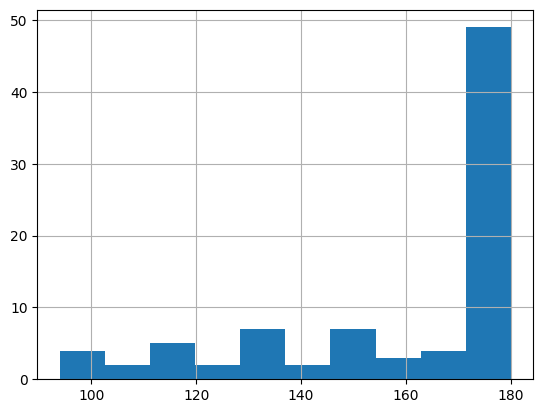

In [ ]:
player_gw_data[player_gw_data['minutes_played']>90]['minutes_played'].hist()


In [ ]:
player_gw_data[player_gw_data['minutes_played']>90]


,player_id,minutes_played,goals,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,...,player_starts,ict_index,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points,in_dreamteam,fixture_id,gameWeek
4202,52,180,0,0,0,3,0,0,0,1,...,2,4.8,0.04,0.05,0.09,3.94,3,False,63,7
4307,157,180,0,0,0,3,0,0,0,0,...,2,3.6,0.06,0.00,0.06,4.50,3,False,66,7
4310,160,180,0,0,0,3,0,0,0,1,...,2,5.2,0.00,0.01,0.01,4.50,2,False,66,7
4311,161,180,0,0,0,3,0,0,0,0,...,2,9.6,0.10,0.46,0.56,4.50,4,False,66,7
4315,165,180,0,0,0,3,0,0,0,0,...,2,5.3,0.05,0.07,0.12,4.50,4,False,66,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20905,586,159,1,0,0,4,0,0,0,0,...,2,11.0,0.56,0.18,0.74,4.41,10,False,276,28
20921,602,180,0,1,0,5,0,0,0,1,...,2,9.0,0.00,0.25,0.25,5.25,4,False,276,28
20932,614,180,0,0,0,5,0,0,0,0,...,2,5.8,0.00,0.00,0.00,5.25,4,False,276,28
20948,630,177,1,0,0,5,0,0,0,0,...,2,11.3,0.40,0.13,0.53,4.95,9,False,276,28


In [ ]:
# data skewed due to multiple games in a gameweek for a team

# need to make minutes_played >90  -->  =90
my_index = player_gw_data[player_gw_data['minutes_played']>90].index
my_index

Index([ 4202,  4307,  4310,  4311,  4315,  4326,  4328,  4466,  4468,  4471,
        4476,  4478,  4543,  4625,  4725,  4732,  4744,  4746,  4752,  4755,
        4763,  4780, 17857, 17926, 17937, 17941, 17945, 17946, 17947, 17950,
       17953, 17955, 18131, 18133, 18134, 18137, 18139, 18140, 18143, 18149,
       18152, 18157, 18162, 18164, 18166, 18176, 18177, 18179, 18180, 18186,
       18188, 18189, 18191, 18201, 18205, 18229, 18344, 18422, 18449, 18465,
       18503, 18513, 18543, 18592, 20384, 20385, 20394, 20396, 20397, 20401,
       20403, 20404, 20405, 20408, 20637, 20639, 20640, 20645, 20647, 20712,
       20905, 20921, 20932, 20948, 21116],
      dtype='int64')

In [ ]:
player_gw_data.loc[my_index, 'minutes_played'] = 90
player_gw_data.loc[my_index]

,player_id,minutes_played,goals,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,...,player_starts,ict_index,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points,in_dreamteam,fixture_id,gameWeek
4202,52,90,0,0,0,3,0,0,0,1,...,2,4.8,0.04,0.05,0.09,3.94,3,False,63,7
4307,157,90,0,0,0,3,0,0,0,0,...,2,3.6,0.06,0.00,0.06,4.50,3,False,66,7
4310,160,90,0,0,0,3,0,0,0,1,...,2,5.2,0.00,0.01,0.01,4.50,2,False,66,7
4311,161,90,0,0,0,3,0,0,0,0,...,2,9.6,0.10,0.46,0.56,4.50,4,False,66,7
4315,165,90,0,0,0,3,0,0,0,0,...,2,5.3,0.05,0.07,0.12,4.50,4,False,66,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20905,586,90,1,0,0,4,0,0,0,0,...,2,11.0,0.56,0.18,0.74,4.41,10,False,276,28
20921,602,90,0,1,0,5,0,0,0,1,...,2,9.0,0.00,0.25,0.25,5.25,4,False,276,28
20932,614,90,0,0,0,5,0,0,0,0,...,2,5.8,0.00,0.00,0.00,5.25,4,False,276,28
20948,630,90,1,0,0,5,0,0,0,0,...,2,11.3,0.40,0.13,0.53,4.95,9,False,276,28


In [ ]:
############################# test

In [ ]:
player_data[player_data['last_name']=='Salah']

,player_id,first_name,last_name,team_id,player_type,minutes_played,form,form_rank,goals,assists,...,red_cards,player_influence,player_influence_rank,player_creativity,player_creativity_rank,player_threat,player_threat_rank,player_starts,player_news,news_date
434,308,Mohamed,Salah,11,3,1964,3.0,97,16,9,...,0,873.0,7,691.2,22,1142.0,4,22,NaN,2024-02-26 00:30:09.476744+00:00


In [ ]:
player_gw_data[player_gw_data['player_id'] == 308]

,player_id,minutes_played,goals,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,...,player_starts,ict_index,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points,in_dreamteam,fixture_id,gameWeek
307,308,76,0,1,0,1,0,0,0,0,...,1,4.9,0.28,0.31,0.59,1.28,5,False,9,1
965,308,85,1,0,0,1,0,0,1,0,...,1,15.3,1.23,0.11,1.34,1.00,5,False,14,2
1635,308,90,0,1,0,1,0,0,0,0,...,1,7.0,0.18,0.12,0.30,2.00,5,False,29,3
2320,308,90,1,0,1,0,0,0,0,0,...,1,18.3,0.80,0.07,0.87,0.66,8,False,37,4
3023,308,90,0,2,0,1,0,0,0,0,...,1,12.1,0.24,1.47,1.71,0.63,10,False,50,5
3740,308,90,1,0,0,1,0,0,0,0,...,1,12.2,1.01,0.27,1.28,1.11,10,False,57,6
4458,308,73,0,0,0,1,0,0,0,1,...,1,3.8,0.05,0.39,0.44,1.44,1,False,68,7
5180,308,90,2,0,0,2,0,0,0,0,...,1,15.6,1.45,0.07,1.52,2.30,15,True,72,8
5905,308,90,2,0,1,0,0,0,0,0,...,1,15.6,1.39,0.05,1.44,0.13,16,True,85,9
6635,308,90,1,0,1,0,0,0,0,0,...,1,8.8,0.58,0.13,0.71,0.45,8,False,97,10


In [ ]:
test = player_gw_data[player_gw_data['player_id'] == 308][player_gw_data['gameWeek'] < 7 ][player_gw_data['gameWeek'] >= 7-5]
test


,player_id,minutes_played,goals,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,...,player_starts,ict_index,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points,in_dreamteam,fixture_id,gameWeek
965,308,85,1,0,0,1,0,0,1,0,...,1,15.3,1.23,0.11,1.34,1.00,5,False,14,2
1635,308,90,0,1,0,1,0,0,0,0,...,1,7.0,0.18,0.12,0.30,2.00,5,False,29,3
2320,308,90,1,0,1,0,0,0,0,0,...,1,18.3,0.80,0.07,0.87,0.66,8,False,37,4
3023,308,90,0,2,0,1,0,0,0,0,...,1,12.1,0.24,1.47,1.71,0.63,10,False,50,5
3740,308,90,1,0,0,1,0,0,0,0,...,1,12.2,1.01,0.27,1.28,1.11,10,False,57,6


In [ ]:
cols = ['minutes_played','clean_sheets', 'bps', 'player_starts', 'expected_goals', 'expected_assists', 'expected_goal_involvements', 'expected_goals_conceded', 'total_points',]

last5_data = test[cols].mean(axis=0)
last5_data

minutes_played                89.000
clean_sheets                   0.200
bps                           26.200
player_starts                  1.000
expected_goals                 0.692
expected_assists               0.408
expected_goal_involvements     1.100
expected_goals_conceded        1.080
total_points                   7.600
dtype: float64

In [ ]:
last5_data = list(last5_data)
last5_data

[89.0, 0.2, 26.2, 1.0, 0.692, 0.40800000000000003, 1.1, 1.08, 7.6]

In [ ]:
df2 = pd.DataFrame(columns= cols)
df2

,minutes_played,clean_sheets,bps,player_starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points


In [ ]:
df2.loc[0, cols] = last5_data
df2

,minutes_played,clean_sheets,bps,player_starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points
0,89.0,0.2,26.2,1.0,0.692,0.408,1.1,1.08,7.6


In [ ]:
df2.loc[0,'bps'], type(df2.loc[0,'bps'])

(26.2, float)

In [ ]:
df2.loc[0, ['bps','minutes_played']] = [111, 1234]
df2

,minutes_played,clean_sheets,bps,player_starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points
0,1234,0.2,111,1.0,0.692,0.408,1.1,1.08,7.6


In [ ]:
player_gw_data[player_gw_data['player_id'] == 308].mean()

player_id                     308.000000
minutes_played                 63.354839
goals                           0.516129
assists                         0.290323
clean_sheets                    0.225806
goals_conceded                  0.645161
own_goals                       0.000000
penalties_saved                 0.000000
penalties_missed                0.064516
yellow_cards                    0.064516
red_cards                       0.000000
saves                           0.000000
bps                            16.870968
player_influence               28.161290
player_creativity              22.296774
player_threat                  36.838710
player_starts                   0.709677
ict_index                       8.738710
expected_goals                  0.521290
expected_assists                0.202581
expected_goal_involvements      0.723871
expected_goals_conceded         0.745806
total_points                    5.677419
in_dreamteam                    0.161290
fixture_id      

In [ ]:
#####################

In [ ]:
#creating the dataframe to be used for training
df = player_gw_data[["player_id", "total_points", "fixture_id", "gameWeek"]].copy()
df

,player_id,total_points,fixture_id,gameWeek
0,1,0,2,1
1,2,0,2,1
2,3,0,2,1
3,4,0,2,1
4,5,1,2,1
...,...,...,...,...
23677,841,0,310,31
23678,842,0,302,31
23679,843,0,303,31
23680,844,0,301,31


In [ ]:
historical_data_cols = ['minutes_played_last5','clean_sheets_last5', 'bps_last5', 'player_starts_last5', 'expected_goals_last5', 'expected_assists_last5', 'expected_goal_involvements_last5', 'expected_goals_conceded_last5', 'total_points_last5',]
df[historical_data_cols] = 0
df.sum()

player_id                           9104275
total_points                          24730
fixture_id                          3826634
gameWeek                             393168
minutes_played_last5                      0
clean_sheets_last5                        0
bps_last5                                 0
player_starts_last5                       0
expected_goals_last5                      0
expected_assists_last5                    0
expected_goal_involvements_last5          0
expected_goals_conceded_last5             0
total_points_last5                        0
dtype: int64

In [ ]:
player_gw_data.index

RangeIndex(start=0, stop=23682, step=1)

In [ ]:
# function for calculating avg historical data

In [ ]:
def get_historical_data(index):

    player_id = player_gw_data.loc[index, 'player_id']
    gameweek = player_gw_data.loc[index, 'gameWeek']
    print('player ID :',player_id,'gameweek :', gameweek)

    temp=player_gw_data[player_gw_data['player_id']==player_id][player_gw_data['gameWeek'] < gameweek][player_gw_data['gameWeek'] >= gameweek-5]

    cols = ['minutes_played','clean_sheets', 'bps', 'player_starts', 'expected_goals', 'expected_assists', 'expected_goal_involvements', 'expected_goals_conceded', 'total_points']
    last5_gw_mean = temp[cols].mean(axis=0)
    last5_gw_mean = list(last5_gw_mean)

    historical_data_cols = ['minutes_played_last5','clean_sheets_last5', 'bps_last5', 'player_starts_last5', 'expected_goals_last5', 'expected_assists_last5', 'expected_goal_involvements_last5', 'expected_goals_conceded_last5', 'total_points_last5']
    df.loc[index, historical_data_cols] = last5_gw_mean


In [ ]:
for index in player_gw_data.index:
  get_historical_data(index)

Streaming output truncated to the last 5000 lines.
player ID : 23 gameweek : 26
player ID : 24 gameweek : 26
player ID : 25 gameweek : 26
player ID : 26 gameweek : 26
player ID : 27 gameweek : 26
player ID : 28 gameweek : 26
player ID : 29 gameweek : 26
player ID : 30 gameweek : 26
player ID : 31 gameweek : 26
player ID : 32 gameweek : 26
player ID : 33 gameweek : 26
player ID : 34 gameweek : 26
player ID : 35 gameweek : 26
player ID : 36 gameweek : 26
player ID : 37 gameweek : 26
player ID : 38 gameweek : 26
player ID : 39 gameweek : 26
player ID : 40 gameweek : 26
player ID : 41 gameweek : 26
player ID : 42 gameweek : 26
player ID : 43 gameweek : 26
player ID : 44 gameweek : 26
player ID : 45 gameweek : 26
player ID : 46 gameweek : 26
player ID : 47 gameweek : 26
player ID : 48 gameweek : 26
player ID : 49 gameweek : 26
player ID : 50 gameweek : 26
player ID : 51 gameweek : 26
player ID : 52 gameweek : 26
player ID : 53 gameweek : 26
player ID : 54 gameweek : 26
player ID : 55 gamewe

In [ ]:
df.count()

player_id                           23682
total_points                        23682
fixture_id                          23682
gameWeek                            23682
minutes_played_last5                22838
clean_sheets_last5                  22838
bps_last5                           22838
player_starts_last5                 22838
expected_goals_last5                22838
expected_assists_last5              22838
expected_goal_involvements_last5    22838
expected_goals_conceded_last5       22838
total_points_last5                  22838
dtype: int64

In [ ]:
df.isnull().sum() # null values due to the first entry for each player (no histortical data)

player_id                             0
total_points                          0
fixture_id                            0
gameWeek                              0
minutes_played_last5                844
clean_sheets_last5                  844
bps_last5                           844
player_starts_last5                 844
expected_goals_last5                844
expected_assists_last5              844
expected_goal_involvements_last5    844
expected_goals_conceded_last5       844
total_points_last5                  844
dtype: int64

In [ ]:
df[df['gameWeek']==1].isnull().sum()

player_id                             0
total_points                          0
fixture_id                            0
gameWeek                              0
minutes_played_last5                658
clean_sheets_last5                  658
bps_last5                           658
player_starts_last5                 658
expected_goals_last5                658
expected_assists_last5              658
expected_goal_involvements_last5    658
expected_goals_conceded_last5       658
total_points_last5                  658
dtype: int64

In [ ]:
# historical data for each player per GW calculated. Need to remove null values

df

,player_id,total_points,fixture_id,gameWeek,minutes_played_last5,clean_sheets_last5,bps_last5,player_starts_last5,expected_goals_last5,expected_assists_last5,expected_goal_involvements_last5,expected_goals_conceded_last5,total_points_last5
0,1,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23677,841,0,310,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23678,842,0,302,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23679,843,0,303,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23680,844,0,301,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# last5 matches minutes played testing

In [ ]:
df['minutes_played_last5']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
23677    0.0
23678    0.0
23679    0.0
23680    NaN
23681    NaN
Name: minutes_played_last5, Length: 23682, dtype: float64

In [ ]:
df[df['total_points']>= 16]

,player_id,total_points,fixture_id,gameWeek,minutes_played_last5,clean_sheets_last5,bps_last5,player_starts_last5,expected_goals_last5,expected_assists_last5,expected_goal_involvements_last5,expected_goals_conceded_last5,total_points_last5
765,108,16,13,2,90.000000,0.000000,14.000000,1.000000,1.350000,0.030000,1.380000,1.260000,7.000000
1363,36,17,25,3,88.000000,0.500000,14.000000,1.000000,0.370000,0.135000,0.505000,1.740000,2.500000
1543,216,19,26,3,85.000000,0.000000,10.500000,1.000000,0.030000,0.160000,0.190000,1.515000,2.000000
2144,132,17,33,4,41.666667,0.000000,7.333333,0.333333,0.550000,0.026667,0.576667,1.553333,2.666667
2367,355,20,39,4,86.333333,0.666667,23.666667,1.000000,0.986667,0.026667,1.013333,0.416667,6.333333
2528,516,20,34,4,84.666667,0.666667,14.333333,1.000000,0.086667,0.240000,0.326667,1.460000,2.666667
3862,430,18,60,6,90.000000,0.200000,19.400000,1.000000,0.002000,0.150000,0.152000,1.180000,2.600000
4164,14,17,62,7,88.400000,0.400000,15.800000,1.000000,0.326000,0.084000,0.410000,0.770000,4.800000
4210,60,23,61,7,82.000000,0.400000,13.400000,1.000000,0.388000,0.052000,0.440000,1.142000,5.200000
5088,216,16,73,8,77.000000,0.400000,12.000000,0.800000,0.336000,0.168000,0.504000,0.828000,5.000000


In [ ]:
####################testing for player data merge

In [ ]:
player_data

,player_id,first_name,last_name,team_id,player_type,minutes_played,form,form_rank,goals,assists,...,red_cards,player_influence,player_influence_rank,player_creativity,player_creativity_rank,player_threat,player_threat_rank,player_starts,player_news,news_date
0,1,Folarin,Balogun,1,4,0,0.0,575,0,0,...,0,0.0,688,0.0,678,0.0,653,0,Transferred to Monaco,2023-08-31 08:55:15.272751+00:00
1,2,Cédric,Alves Soares,1,2,59,0.0,371,0,0,...,0,2.0,519,4.3,457,0.0,476,0,NaN,NaN
2,3,Mohamed,Elneny,1,3,25,0.0,560,0,1,...,0,4.0,505,2.1,473,10.0,434,0,NaN,2023-12-30 22:30:09.113694+00:00
3,4,Fábio,Ferreira Vieira,1,3,281,0.0,807,1,3,...,1,82.2,390,77.7,312,79.0,279,2,NaN,2023-12-07 12:00:08.489004+00:00
4,5,Gabriel,dos Santos Magalhães,1,2,2354,4.3,40,3,1,...,0,565.0,54,110.3,259,306.0,97,26,NaN,2024-03-18 22:00:08.938811+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,788,Yerson,Mosquera,20,2,0,0.0,475,0,0,...,0,0.0,626,0.0,611,0.0,576,0,On loan to Villarreal until the end of the season,2024-01-25 09:07:40.695577+00:00
840,800,Noha,Lemina,20,3,0,0.0,787,0,0,...,0,0.0,826,0.0,823,0.0,821,0,NaN,NaN
841,832,Wesley,Okoduwa,20,2,0,0.0,505,0,0,...,0,0.0,656,0.0,642,0.0,607,0,NaN,NaN
842,836,Leon,Chiwome,20,4,158,1.3,222,0,0,...,0,5.6,498,1.1,485,13.0,427,2,NaN,NaN


In [ ]:
df2 = df.copy()
player_copy = player_data[['first_name', 'last_name', 'player_id', 'team_id', 'player_type']].copy()
player_copy.head(2)

,first_name,last_name,player_id,team_id,player_type
0,Folarin,Balogun,1,1,4
1,Cédric,Alves Soares,2,1,2


In [ ]:
df3 = pd.merge(df2, player_copy, how='left', on='player_id')
df3

,player_id,total_points,fixture_id,gameWeek,minutes_played_last5,clean_sheets_last5,bps_last5,player_starts_last5,expected_goals_last5,expected_assists_last5,expected_goal_involvements_last5,expected_goals_conceded_last5,total_points_last5,first_name,last_name,team_id,player_type
0,1,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Folarin,Balogun,1,4
1,2,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cédric,Alves Soares,1,2
2,3,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mohamed,Elneny,1,3
3,4,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fábio,Ferreira Vieira,1,3
4,5,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gabriel,dos Santos Magalhães,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23677,841,0,310,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lewis,Warrington,9,3
23678,842,0,302,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Roshaun,Mathurin,8,3
23679,843,0,303,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Samy,Chouchane,5,3
23680,844,0,301,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christian,Chigozie,12,2


In [ ]:
df3[df3['team_id'] == 20]

,player_id,total_points,fixture_id,gameWeek,minutes_played_last5,clean_sheets_last5,bps_last5,player_starts_last5,expected_goals_last5,expected_assists_last5,expected_goal_involvements_last5,expected_goals_conceded_last5,total_points_last5,first_name,last_name,team_id,player_type
350,351,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tommy,Doyle,20,3
544,545,1,10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rayan,Aït-Nouri,20,2
545,546,0,10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Daniel,Bentley,20,1
546,547,0,10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bendegúz,Bolla,20,2
547,548,1,10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hugo,Bueno López,20,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23624,788,0,304,31,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,Yerson,Mosquera,20,2
23636,800,0,304,31,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,Noha,Lemina,20,3
23668,832,0,304,31,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,Wesley,Okoduwa,20,2
23672,836,2,304,31,27.666667,0.0,2.0,0.333333,0.013333,0.0,0.013333,0.323333,0.666667,Leon,Chiwome,20,4


In [ ]:
df3.isnull().sum()

player_id                             0
total_points                          0
fixture_id                            0
gameWeek                              0
minutes_played_last5                844
clean_sheets_last5                  844
bps_last5                           844
player_starts_last5                 844
expected_goals_last5                844
expected_assists_last5              844
expected_goal_involvements_last5    844
expected_goals_conceded_last5       844
total_points_last5                  844
first_name                            0
last_name                             0
team_id                               0
player_type                           0
dtype: int64

In [ ]:
########################## testing for fixture data

In [ ]:
fixture_data

,Unnamed: 0,match_id,gameWeek,kickoff_time,started,finished,minutes,home_team,home_score,away_team,away_score,home_diff,away_diff,code,pulse_id
0,1,1,1,2023-08-11 19:00:00+00:00,True,True,90,6,0,13,3,5,2,2367538,93321
1,2,2,1,2023-08-12 12:00:00+00:00,True,True,90,1,2,16,1,2,4,2367540,93322
2,3,3,1,2023-08-12 14:00:00+00:00,True,True,90,3,1,19,1,2,2,2367539,93323
3,4,4,1,2023-08-12 14:00:00+00:00,True,True,90,5,4,12,1,2,3,2367541,93324
4,5,5,1,2023-08-12 14:00:00+00:00,True,True,90,9,0,10,1,2,2,2367542,93325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,375,376,38,2024-05-19 15:00:00+00:00,False,False,0,8,0,2,0,3,2,2367913,93696
375,376,377,38,2024-05-19 15:00:00+00:00,False,False,0,11,0,20,0,2,4,2367914,93697
376,377,378,38,2024-05-19 15:00:00+00:00,False,False,0,12,0,10,0,2,2,2367915,93698
377,378,379,38,2024-05-19 15:00:00+00:00,False,False,0,13,0,19,0,2,5,2367916,93699


In [ ]:
fixture_data[fixture_data['home_score']>5]

,Unnamed: 0,match_id,gameWeek,kickoff_time,started,finished,minutes,home_team,home_score,away_team,away_score,home_diff,away_diff,code,pulse_id
59,60,61,7,2023-09-30 11:30:00+00:00,True,True,90,2,6,5,1,3,3,2367599,93381
104,105,106,11,2023-11-04 15:00:00+00:00,True,True,90,13,6,3,1,2,5,2367643,93426


In [ ]:
# considering match_id = 61 : home_team = 2 (aston villa), away_team = 5 (brighton)

In [ ]:
df3[df3['team_id'] == 2][['fixture_id', 'first_name', 'last_name', 'team_id' ]]

# team_id = 2 --> aston villa in df3 dataframe also

,fixture_id,first_name,last_name,team_id
31,6,Alexandre,Moreno Lopera,2
33,6,Leon,Bailey,2
34,6,Emiliano,Buendía Stati,2
35,6,Matty,Cash,2
36,6,Calum,Chambers,2
...,...,...,...,...
23603,309,Tommi,O'Reilly,2
23614,309,James,Wright,2
23629,309,Kaine,Kesler-Hayden,2
23639,309,Morgan,Rogers,2


In [ ]:
df3[df3['team_id'] == 5][['fixture_id', 'first_name', 'last_name', 'team_id' ]]
# team_id = 5 --> brighton in df3 dataframe also

,fixture_id,first_name,last_name,team_id
121,4,Simon,Adingra,5
122,4,Steven,Alzate,5
123,4,Yasin,Ayari,5
124,4,Facundo,Buonanotte,5
126,4,Aaron,Connolly,5
...,...,...,...,...
23591,303,Luca,Barrington,5
23622,303,Cameron,Peupion,5
23652,303,Valentín,Barco,5
23679,303,Samy,Chouchane,5


In [ ]:
# so df3.team_id == fixture_data.home_team or fixture_data.away_team

In [ ]:
#consider match_id = 1
fixture_data[fixture_data['match_id'] == 1]

,Unnamed: 0,match_id,gameWeek,kickoff_time,started,finished,minutes,home_team,home_score,away_team,away_score,home_diff,away_diff,code,pulse_id
0,1,1,1,2023-08-11 19:00:00+00:00,True,True,90,6,0,13,3,5,2,2367538,93321


In [ ]:
df3[df3['team_id'] == 6][['fixture_id', 'first_name', 'last_name', 'team_id' ]]
# home_team = 6 (burnley) , home_difficulty = 5 (opponent = Man city)

,fixture_id,first_name,last_name,team_id
155,1,Enock,Agyei,6
156,1,Ameen,Al-Dakhil,6
157,1,Samuel,Bastien,6
158,1,Manuel Benson,Hedilazio,6
159,1,Jordan,Beyer,6
...,...,...,...,...
23511,304,Aaron,Ramsey,6
23530,304,Han-Noah,Massengo,6
23542,304,Mike,Trésor,6
23641,304,Lorenz,Assignon,6


In [ ]:
df3[df3['team_id'] == 13][['fixture_id', 'first_name', 'last_name', 'team_id' ]]
# home_team = 13 (Man city) , away_difficulty = 2 (opponent = burnley)

,fixture_id,first_name,last_name,team_id
340,1,Manuel,Akanji,13
341,1,Nathan,Aké,13
342,1,Julián,Álvarez,13
343,1,Bernardo,Veiga de Carvalho e Silva,13
344,1,Oscar,Bobb,13
...,...,...,...,...
23452,309,Joško,Gvardiol,13
23514,309,Jérémy,Doku,13
23598,309,Mahamadou,Susoho,13
23607,309,Micah,Hamilton,13


In [ ]:
# so take difficulty value for each fixture (if team_id = home_team , difficulty =  home_diff else difficulty = away_diff)

In [ ]:
fixture_data[fixture_data['match_id'] == 1]


,Unnamed: 0,match_id,gameWeek,kickoff_time,started,finished,minutes,home_team,home_score,away_team,away_score,home_diff,away_diff,code,pulse_id
0,1,1,1,2023-08-11 19:00:00+00:00,True,True,90,6,0,13,3,5,2,2367538,93321


In [ ]:
fixture_data[fixture_data['match_id'] == 1]['away_team'].values[0]

13

In [ ]:
fixture_data[fixture_data['match_id'] == 1].loc[0,'home_diff']


5

In [ ]:
df3['difficulty'] = 0
df3['is_home_team'] = 0

In [ ]:
# function to get fixture difficulty for ear player for each match

def get_difficulty_and_is_home_team(index):

    player_id = df3.loc[index, 'player_id']
    team_id = df3.loc[index, 'team_id']
    gameweek = df3.loc[index, 'gameWeek']
    fixture_id = df3.loc[index, 'fixture_id']
    print('player ID :',player_id, 'team ID :',team_id, 'gameweek :', gameweek, 'fixture_id :', fixture_id)

    selected_fixture = fixture_data[fixture_data['match_id'] == fixture_id]

    if team_id == selected_fixture['home_team'].values[0] :
      df3.loc[index, 'difficulty'] = selected_fixture['home_diff'].values[0]
      print(df3.loc[index, 'difficulty'])
      df3.loc[index, 'is_home_team'] = 1

    elif team_id == selected_fixture['away_team'].values[0]:
      df3.loc[index, 'difficulty'] = selected_fixture['away_diff'].values[0]
      print(df3.loc[index, 'difficulty'])

    else:
      df3.loc[index, 'difficulty'] = -1


In [ ]:
for index in df3.index:
  get_difficulty_and_is_home_team(index)

Streaming output truncated to the last 5000 lines.
2
player ID : 618 team ID : 2 gameweek : 28 fixture_id : 272
3
player ID : 619 team ID : 3 gameweek : 28 fixture_id : 273
2
player ID : 620 team ID : 4 gameweek : 28 fixture_id : 271
4
player ID : 621 team ID : 5 gameweek : 28 fixture_id : 274
2
player ID : 622 team ID : 6 gameweek : 28 fixture_id : 279
3
player ID : 623 team ID : 7 gameweek : 28 fixture_id : 275
4
player ID : 624 team ID : 9 gameweek : 28 fixture_id : 278
4
player ID : 625 team ID : 10 gameweek : 28 fixture_id : 280
2
player ID : 626 team ID : 11 gameweek : 28 fixture_id : 277
5
player ID : 627 team ID : 11 gameweek : 28 fixture_id : 277
5
player ID : 628 team ID : 11 gameweek : 28 fixture_id : 277
5
player ID : 629 team ID : 11 gameweek : 28 fixture_id : 277
5
player ID : 630 team ID : 12 gameweek : 28 fixture_id : 276
2
player ID : 631 team ID : 12 gameweek : 28 fixture_id : 276
2
player ID : 632 team ID : 14 gameweek : 28 fixture_id : 278
2
player ID : 633 team ID 

In [ ]:
df3['difficulty'].value_counts()

difficulty
 2    10730
 3     6903
 4     3886
 5     1106
-1     1057
Name: count, dtype: int64

In [ ]:
df3['difficulty'].median()

3.0

In [ ]:
# difficulty =-1 is due to the player changed the team , change it to 3 (median)
for index in df3.index:
  if df3.loc[index, 'difficulty'] == -1 :
    df3.loc[index, 'difficulty'] = df3['difficulty'].median()


In [ ]:
df3['difficulty'].value_counts()

difficulty
2    10730
3     7960
4     3886
5     1106
Name: count, dtype: int64

In [ ]:
# difference is due to team(s) size
df3['is_home_team'].value_counts()


is_home_team
0    12354
1    11328
Name: count, dtype: int64

In [ ]:
df3

,player_id,total_points,fixture_id,gameWeek,minutes_played_last5,clean_sheets_last5,bps_last5,player_starts_last5,expected_goals_last5,expected_assists_last5,expected_goal_involvements_last5,expected_goals_conceded_last5,total_points_last5,first_name,last_name,team_id,player_type,difficulty,is_home_team
0,1,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Folarin,Balogun,1,4,2,1
1,2,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cédric,Alves Soares,1,2,2,1
2,3,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mohamed,Elneny,1,3,2,1
3,4,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fábio,Ferreira Vieira,1,3,2,1
4,5,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gabriel,dos Santos Magalhães,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23677,841,0,310,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lewis,Warrington,9,3,4,0
23678,842,0,302,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Roshaun,Mathurin,8,3,2,0
23679,843,0,303,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Samy,Chouchane,5,3,3,0
23680,844,0,301,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christian,Chigozie,12,2,4,0


In [ ]:
# data cleaning

In [ ]:
df4 = df3.copy()

In [ ]:
df4.shape

(23682, 19)

In [ ]:
df4.isnull().sum()

player_id                             0
total_points                          0
fixture_id                            0
gameWeek                              0
minutes_played_last5                844
clean_sheets_last5                  844
bps_last5                           844
player_starts_last5                 844
expected_goals_last5                844
expected_assists_last5              844
expected_goal_involvements_last5    844
expected_goals_conceded_last5       844
total_points_last5                  844
first_name                            0
last_name                             0
team_id                               0
player_type                           0
difficulty                            0
is_home_team                          0
dtype: int64

In [ ]:
df4.dropna(axis=0, inplace = True)

In [ ]:
df4.shape

(22838, 19)

In [ ]:
df4.isnull().sum()

player_id                           0
total_points                        0
fixture_id                          0
gameWeek                            0
minutes_played_last5                0
clean_sheets_last5                  0
bps_last5                           0
player_starts_last5                 0
expected_goals_last5                0
expected_assists_last5              0
expected_goal_involvements_last5    0
expected_goals_conceded_last5       0
total_points_last5                  0
first_name                          0
last_name                           0
team_id                             0
player_type                         0
difficulty                          0
is_home_team                        0
dtype: int64

In [ ]:
df4.dtypes

player_id                             int64
total_points                          int64
fixture_id                            int64
gameWeek                              int64
minutes_played_last5                float64
clean_sheets_last5                  float64
bps_last5                           float64
player_starts_last5                 float64
expected_goals_last5                float64
expected_assists_last5              float64
expected_goal_involvements_last5    float64
expected_goals_conceded_last5       float64
total_points_last5                  float64
first_name                           object
last_name                            object
team_id                               int64
player_type                           int64
difficulty                            int64
is_home_team                          int64
dtype: object

In [ ]:
df4.to_csv('cleaned_data.csv', index=False)

In [ ]:
df4 = df4.drop(columns=['first_name', 'last_name','player_id', 'fixture_id', 'team_id', ]) #  'gameWeek'

In [ ]:
#EDA

In [ ]:
df4.dtypes

total_points                          int64
gameWeek                              int64
minutes_played_last5                float64
clean_sheets_last5                  float64
bps_last5                           float64
player_starts_last5                 float64
expected_goals_last5                float64
expected_assists_last5              float64
expected_goal_involvements_last5    float64
expected_goals_conceded_last5       float64
total_points_last5                  float64
player_type                           int64
difficulty                            int64
is_home_team                          int64
dtype: object

In [ ]:
df4

,total_points,gameWeek,minutes_played_last5,clean_sheets_last5,bps_last5,player_starts_last5,expected_goals_last5,expected_assists_last5,expected_goal_involvements_last5,expected_goals_conceded_last5,total_points_last5,player_type,difficulty,is_home_team
658,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,4,2,0
659,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2,2,0
660,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,3,2,0
661,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,3,2,0
662,1,2,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.02,1.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23675,0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,3,4,0
23676,0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,4,2,0
23677,0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,3,4,0
23678,0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,3,2,0


In [ ]:
df4.describe()

,total_points,gameWeek,minutes_played_last5,clean_sheets_last5,bps_last5,player_starts_last5,expected_goals_last5,expected_assists_last5,expected_goal_involvements_last5,expected_goals_conceded_last5,total_points_last5,player_type,difficulty,is_home_team
count,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000
mean,1.044531,17.069884,25.385879,0.064321,4.738418,0.285992,0.041129,0.025867,0.066988,0.450734,1.062812,2.575401,2.802960,0.478369
std,2.290327,8.636192,32.948509,0.141981,6.822069,0.388935,0.104288,0.058611,0.140811,0.630971,1.619955,0.856158,0.873466,0.499543
min,-4.000000,2.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,1.000000,2.000000,0.000000
25%,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,0.000000,17.000000,2.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.032000,0.200000,3.000000,3.000000,0.000000
75%,1.000000,25.000000,53.400000,0.000000,8.400000,0.600000,0.028000,0.022000,0.072000,0.816000,1.666667,3.000000,3.000000,1.000000
max,23.000000,31.000000,90.000000,1.000000,56.000000,1.200000,1.570000,0.940000,1.705000,4.595000,14.000000,4.000000,5.000000,1.000000


In [ ]:
df4.columns

Index(['total_points', 'gameWeek', 'minutes_played_last5',
       'clean_sheets_last5', 'bps_last5', 'player_starts_last5',
       'expected_goals_last5', 'expected_assists_last5',
       'expected_goal_involvements_last5', 'expected_goals_conceded_last5',
       'total_points_last5', 'player_type', 'difficulty', 'is_home_team'],
      dtype='object')

In [ ]:
numerical_columns = ['gameWeek', 'minutes_played_last5', 'clean_sheets_last5', 'bps_last5', 'player_starts_last5', 'expected_goals_last5', 'expected_assists_last5', 'expected_goal_involvements_last5', 'expected_goals_conceded_last5', 'total_points_last5', 'total_points']
categorical_columns = [ 'player_type', 'difficulty', 'is_home_team'] # 'team_id',

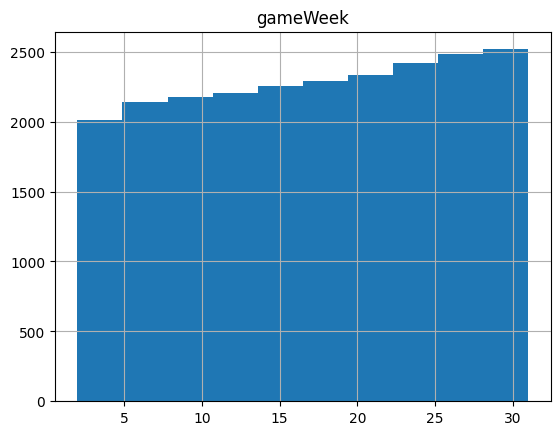

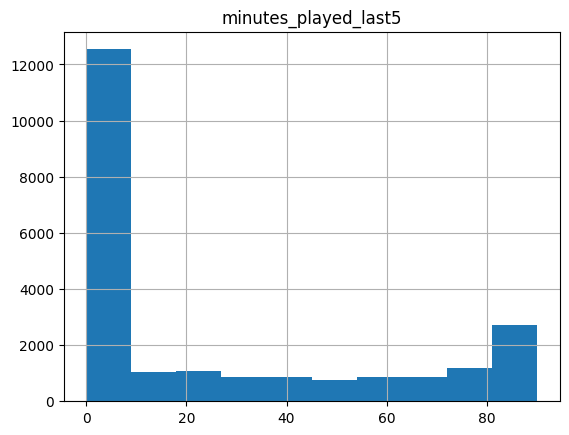

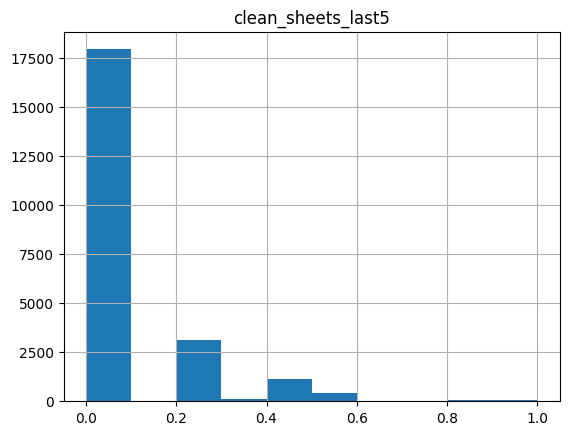

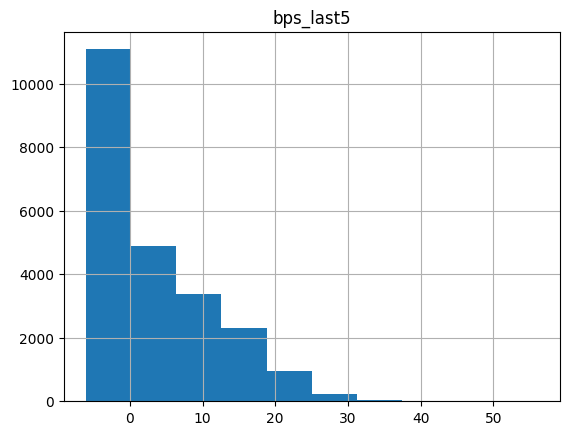

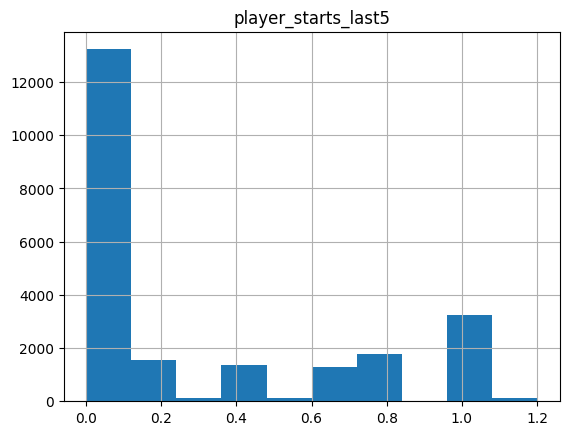

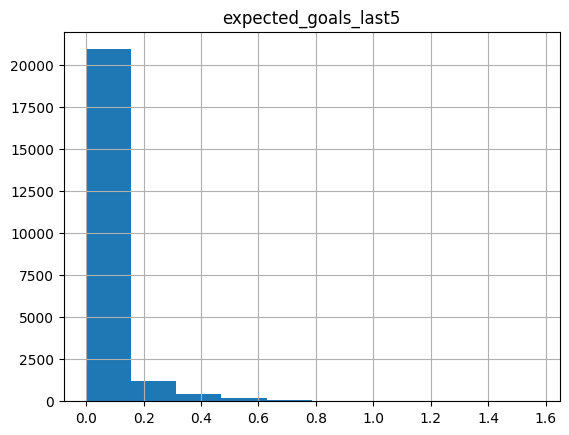

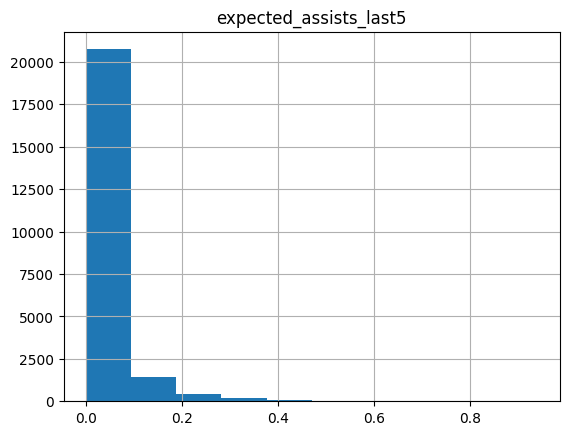

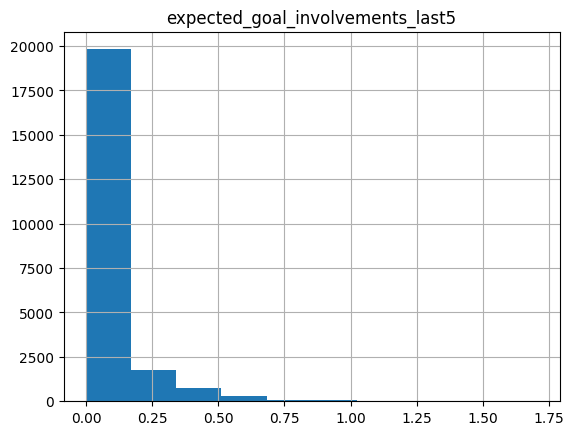

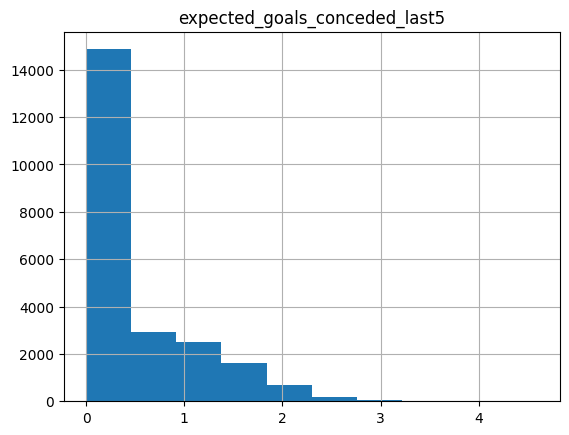

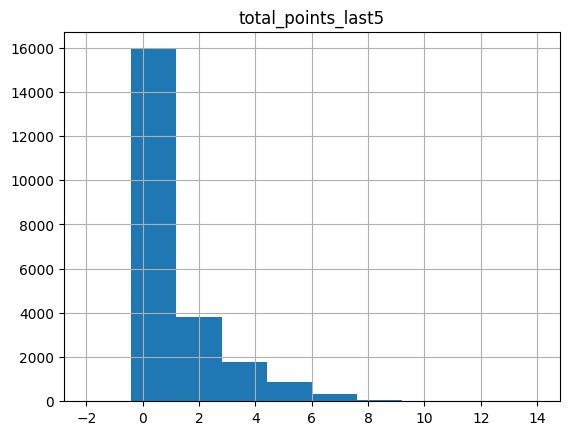

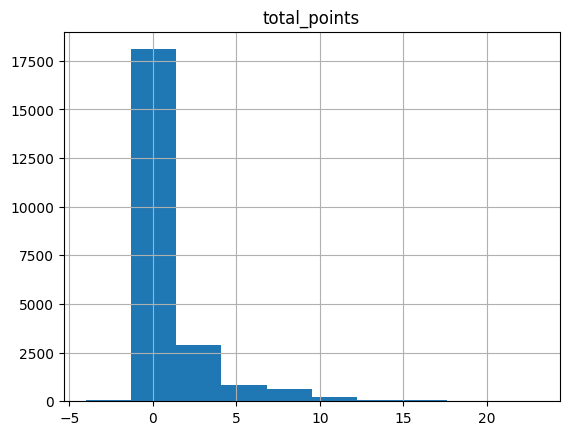

In [ ]:
for num_col in numerical_columns:
  plt.title(num_col);
  df4[num_col].hist();
  plt.show();

In [ ]:
df4[numerical_columns].min()

gameWeek                            2.0
minutes_played_last5                0.0
clean_sheets_last5                  0.0
bps_last5                          -6.0
player_starts_last5                 0.0
expected_goals_last5                0.0
expected_assists_last5              0.0
expected_goal_involvements_last5    0.0
expected_goals_conceded_last5       0.0
total_points_last5                 -2.0
total_points                       -4.0
dtype: float64

In [ ]:
df4['bps_last5'] = df4['bps_last5'] + abs(df4['bps_last5'].min())
df4['total_points_last5'] = df4['total_points_last5'] + abs(df4['total_points_last5'].min())

In [ ]:
df4[numerical_columns].min()

gameWeek                            2.0
minutes_played_last5                0.0
clean_sheets_last5                  0.0
bps_last5                           0.0
player_starts_last5                 0.0
expected_goals_last5                0.0
expected_assists_last5              0.0
expected_goal_involvements_last5    0.0
expected_goals_conceded_last5       0.0
total_points_last5                  0.0
total_points                       -4.0
dtype: float64

In [ ]:
df4.describe()

,total_points,gameWeek,minutes_played_last5,clean_sheets_last5,bps_last5,player_starts_last5,expected_goals_last5,expected_assists_last5,expected_goal_involvements_last5,expected_goals_conceded_last5,total_points_last5,player_type,difficulty,is_home_team
count,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000,22838.000000
mean,1.044531,17.069884,25.385879,0.064321,10.738418,0.285992,0.041129,0.025867,0.066988,0.450734,3.062812,2.575401,2.802960,0.478369
std,2.290327,8.636192,32.948509,0.141981,6.822069,0.388935,0.104288,0.058611,0.140811,0.630971,1.619955,0.856158,0.873466,0.499543
min,-4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
25%,0.000000,10.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000
50%,0.000000,17.000000,2.000000,0.000000,6.600000,0.000000,0.000000,0.000000,0.000000,0.032000,2.200000,3.000000,3.000000,0.000000
75%,1.000000,25.000000,53.400000,0.000000,14.400000,0.600000,0.028000,0.022000,0.072000,0.816000,3.666667,3.000000,3.000000,1.000000
max,23.000000,31.000000,90.000000,1.000000,62.000000,1.200000,1.570000,0.940000,1.705000,4.595000,16.000000,4.000000,5.000000,1.000000


In [ ]:
df4[numerical_columns].skew()

gameWeek                           -0.074988
minutes_played_last5                0.898521
clean_sheets_last5                  2.656702
bps_last5                           1.495351
player_starts_last5                 0.917317
expected_goals_last5                4.553707
expected_assists_last5              3.966675
expected_goal_involvements_last5    3.456539
expected_goals_conceded_last5       1.429883
total_points_last5                  1.981505
total_points                        3.337866
dtype: float64

In [ ]:
# transforming to reduce the positive skewness in the data
# not including total_points as it is the predictor variable ; gameweek not included as it has low negative skew

cols_to_reduce_skew = ['minutes_played_last5', 'clean_sheets_last5', 'bps_last5', 'player_starts_last5', 'expected_goals_last5', 'expected_assists_last5', 'expected_goal_involvements_last5', 'expected_goals_conceded_last5', 'total_points_last5']
df4[cols_to_reduce_skew] = np.log(df4[cols_to_reduce_skew]+ 1)
df4[cols_to_reduce_skew].skew()

minutes_played_last5                0.237945
clean_sheets_last5                  2.245881
bps_last5                           0.879180
player_starts_last5                 0.789493
expected_goals_last5                3.627351
expected_assists_last5              3.415877
expected_goal_involvements_last5    2.737586
expected_goals_conceded_last5       0.924394
total_points_last5                  1.236411
dtype: float64

In [ ]:
# df4[cols_to_reduce_skew] = np.sqrt(df4[cols_to_reduce_skew]+ 1)

In [ ]:
df4[numerical_columns].skew()

gameWeek                           -0.074988
minutes_played_last5                0.237945
clean_sheets_last5                  2.245881
bps_last5                           0.879180
player_starts_last5                 0.789493
expected_goals_last5                3.627351
expected_assists_last5              3.415877
expected_goal_involvements_last5    2.737586
expected_goals_conceded_last5       0.924394
total_points_last5                  1.236411
total_points                        3.337866
dtype: float64

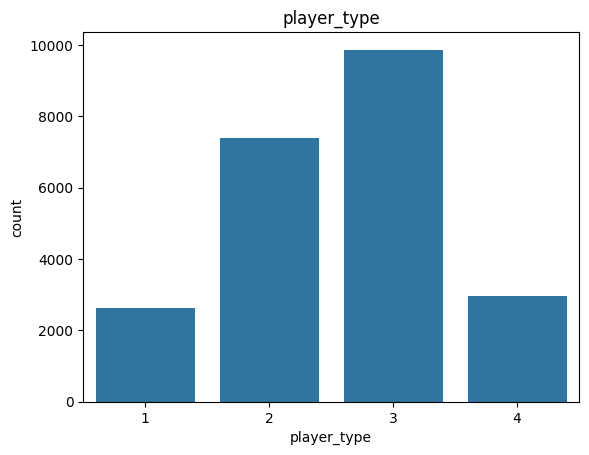

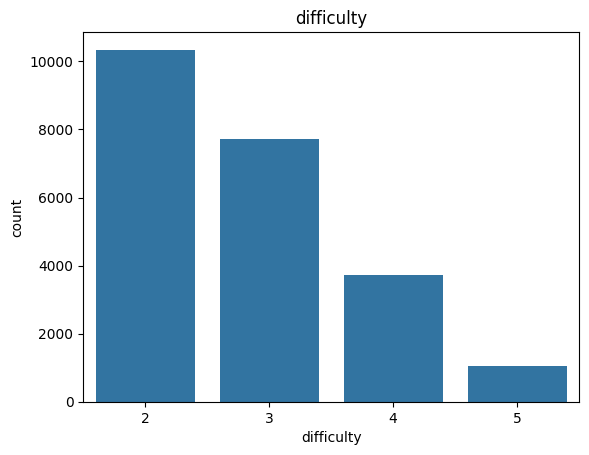

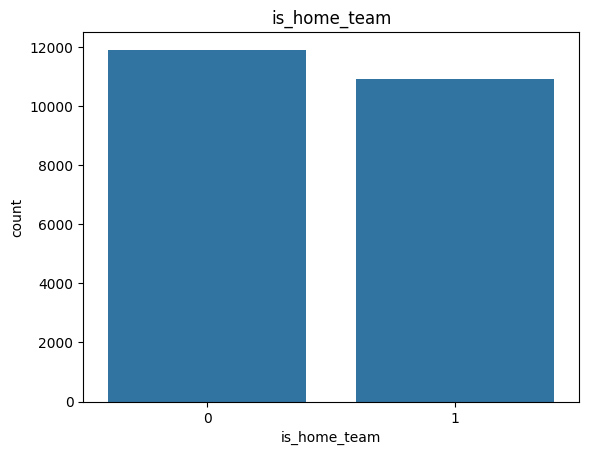

In [ ]:
for cat_col in categorical_columns:
  plt.title(cat_col);
  sns.barplot(x =df4[cat_col].value_counts().index, y = df4[cat_col].value_counts())
  plt.show()

In [ ]:
df4.count()

total_points                        22838
gameWeek                            22838
minutes_played_last5                22838
clean_sheets_last5                  22838
bps_last5                           22838
player_starts_last5                 22838
expected_goals_last5                22838
expected_assists_last5              22838
expected_goal_involvements_last5    22838
expected_goals_conceded_last5       22838
total_points_last5                  22838
player_type                         22838
difficulty                          22838
is_home_team                        22838
dtype: int64

In [ ]:
df4[df4['minutes_played_last5']==0][df4['total_points']!=0]

,total_points,gameWeek,minutes_played_last5,clean_sheets_last5,bps_last5,player_starts_last5,expected_goals_last5,expected_assists_last5,expected_goal_involvements_last5,expected_goals_conceded_last5,total_points_last5,player_type,difficulty,is_home_team
666,1,2,0.0,0.0,1.94591,0.0,0.0,0.0,0.0,0.0,1.098612,3,2,0
667,1,2,0.0,0.0,1.94591,0.0,0.0,0.0,0.0,0.0,1.098612,2,2,0
688,1,2,0.0,0.0,1.94591,0.0,0.0,0.0,0.0,0.0,1.098612,2,2,0
701,7,2,0.0,0.0,1.94591,0.0,0.0,0.0,0.0,0.0,1.098612,4,2,1
727,1,2,0.0,0.0,1.94591,0.0,0.0,0.0,0.0,0.0,1.098612,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23418,1,31,0.0,0.0,1.94591,0.0,0.0,0.0,0.0,0.0,1.098612,2,2,1
23424,1,31,0.0,0.0,1.94591,0.0,0.0,0.0,0.0,0.0,1.098612,3,4,0
23427,1,31,0.0,0.0,1.94591,0.0,0.0,0.0,0.0,0.0,1.098612,4,2,0
23454,1,31,0.0,0.0,1.94591,0.0,0.0,0.0,0.0,0.0,1.098612,3,5,0


In [ ]:
# feature engineering

In [ ]:
# need to decide if removing avg last 5 minutes = 0  or not

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df5 = df4.copy()

In [ ]:
# df5 = df5[['expected_goal_involvements_last5', 'expected_goals_conceded_last5', 'player_type', 'difficulty', 'is_home_team', 'total_points']]

In [ ]:
print(df5.shape)
df5 = df5.drop_duplicates()
print(df5.shape)


(22838, 14)
(13218, 14)


In [ ]:
# removing skewed data in total_points (high points scored in a match)

In [ ]:
df5[df5['total_points'] >= 8].shape

(726, 14)

In [ ]:
df5[df5['total_points'] < 0].shape


(127, 14)

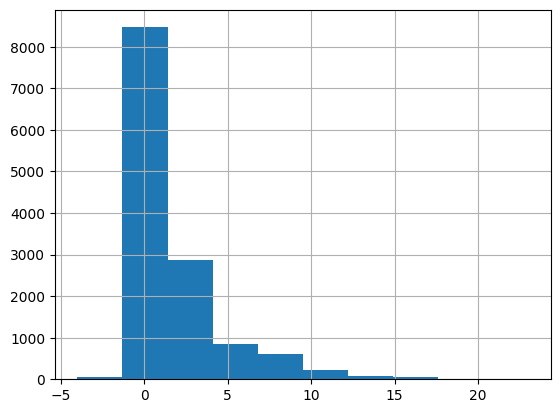

In [ ]:
df5['total_points'].hist();

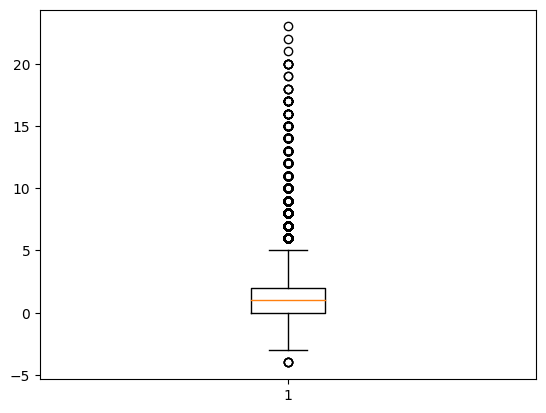

In [ ]:
# df5['total_points']
plt.boxplot(df5['total_points']);

In [ ]:
df5 = df5[df5['total_points'] < 9]
print(df5.shape)


(12701, 14)


In [ ]:
df5 = df5[df5['total_points'] >= 0 ]
print(df5.shape)

(12574, 14)


In [ ]:
df5 = pd.get_dummies(df5, columns=['player_type', ], dtype = 'int') # 'team_id'
df5

,total_points,gameWeek,minutes_played_last5,clean_sheets_last5,bps_last5,player_starts_last5,expected_goals_last5,expected_assists_last5,expected_goal_involvements_last5,expected_goals_conceded_last5,total_points_last5,difficulty,is_home_team,player_type_1,player_type_2,player_type_3,player_type_4
658,0,2,0.000000,0.0,1.945910,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,2,0,0,0,0,1
659,0,2,0.000000,0.0,1.945910,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,2,0,0,1,0,0
660,0,2,0.000000,0.0,1.945910,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,2,0,0,0,1,0
662,1,2,1.609438,0.0,2.197225,0.000000,0.000000,0.000000,0.000000,0.019803,1.386294,2,0,0,1,0,0
663,2,2,4.510860,0.0,2.890372,0.693147,0.048790,0.215111,0.254642,0.779325,1.609438,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23644,2,31,4.510860,0.0,2.912351,0.693147,0.000000,0.000000,0.000000,0.947014,1.568616,2,1,1,0,0,0
23652,0,31,0.182322,0.0,1.974081,0.000000,0.000000,0.000000,0.000000,0.007968,1.163151,3,0,0,1,0,0
23659,2,31,3.658420,0.0,2.451005,0.336472,0.003992,0.001998,0.005982,0.559616,1.386294,4,0,0,0,1,0
23660,0,31,0.788457,0.0,1.916923,0.000000,0.000000,0.001998,0.001998,0.025668,1.098612,2,1,0,0,0,1


In [ ]:
df5[df5['minutes_played_last5'] == 0]

,total_points,gameWeek,minutes_played_last5,clean_sheets_last5,bps_last5,player_starts_last5,expected_goals_last5,expected_assists_last5,expected_goal_involvements_last5,expected_goals_conceded_last5,total_points_last5,difficulty,is_home_team,player_type_1,player_type_2,player_type_3,player_type_4
658,0,2,0.0,0.0,1.94591,0.0,0.0,0.0,0.0,0.0,1.098612,2,0,0,0,0,1
659,0,2,0.0,0.0,1.94591,0.0,0.0,0.0,0.0,0.0,1.098612,2,0,0,1,0,0
660,0,2,0.0,0.0,1.94591,0.0,0.0,0.0,0.0,0.0,1.098612,2,0,0,0,1,0
664,0,2,0.0,0.0,1.94591,0.0,0.0,0.0,0.0,0.0,1.098612,4,1,0,1,0,0
666,1,2,0.0,0.0,1.94591,0.0,0.0,0.0,0.0,0.0,1.098612,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23203,1,31,0.0,0.0,1.94591,0.0,0.0,0.0,0.0,0.0,1.098612,3,1,0,1,0,0
23418,1,31,0.0,0.0,1.94591,0.0,0.0,0.0,0.0,0.0,1.098612,2,1,0,1,0,0
23424,1,31,0.0,0.0,1.94591,0.0,0.0,0.0,0.0,0.0,1.098612,4,0,0,0,1,0
23427,1,31,0.0,0.0,1.94591,0.0,0.0,0.0,0.0,0.0,1.098612,2,0,0,0,0,1


In [ ]:
df5[df5['total_points'] == 0]


,total_points,gameWeek,minutes_played_last5,clean_sheets_last5,bps_last5,player_starts_last5,expected_goals_last5,expected_assists_last5,expected_goal_involvements_last5,expected_goals_conceded_last5,total_points_last5,difficulty,is_home_team,player_type_1,player_type_2,player_type_3,player_type_4
658,0,2,0.000000,0.0,1.945910,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,2,0,0,0,0,1
659,0,2,0.000000,0.0,1.945910,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,2,0,0,1,0,0
660,0,2,0.000000,0.0,1.945910,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,2,0,0,0,1,0
664,0,2,0.000000,0.0,1.945910,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,4,1,0,1,0,0
675,0,2,0.000000,0.0,1.945910,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23630,0,31,1.029619,0.0,1.974081,0.000000,0.000000,0.000000,0.000000,0.003992,1.098612,2,1,0,0,1,0
23635,0,31,1.098612,0.0,1.974081,0.000000,0.000000,0.001998,0.001998,0.003992,1.163151,2,1,0,0,1,0
23641,0,31,4.391977,0.0,2.468100,0.693147,0.005982,0.131028,0.136278,1.298555,1.163151,2,1,0,1,0,0
23652,0,31,0.182322,0.0,1.974081,0.000000,0.000000,0.000000,0.000000,0.007968,1.163151,3,0,0,1,0,0


In [ ]:
X = df5.copy()
X = X.drop(columns=['total_points'])
y = df5['total_points'].copy()

print(X.shape, y.shape)

(12574, 16) (12574,)


In [ ]:
# testing feature importance
from sklearn.feature_selection import RFE
model = RandomForestRegressor(random_state=10)
rfe = RFE(model, n_features_to_select=13)
fit = rfe.fit(X,y)

In [ ]:
print(fit.n_features_, fit.support_, fit.ranking_)

13 [ True  True  True  True  True  True  True  True  True  True  True  True
 False  True False False] [1 1 1 1 1 1 1 1 1 1 1 1 4 1 2 3]


In [ ]:
selected_cols = X.columns[fit.support_]
selected_cols

Index(['gameWeek', 'minutes_played_last5', 'clean_sheets_last5', 'bps_last5',
       'player_starts_last5', 'expected_goals_last5', 'expected_assists_last5',
       'expected_goal_involvements_last5', 'expected_goals_conceded_last5',
       'total_points_last5', 'difficulty', 'is_home_team', 'player_type_2'],
      dtype='object')

In [ ]:
# for transforming data with only selected fratures
X = X[selected_cols]

In [ ]:
####################

In [ ]:
X.shape, y.shape

((12574, 13), (12574,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11316, 13), (1258, 13), (11316,), (1258,))

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
numerical_columns = ['minutes_played_last5', 'clean_sheets_last5', 'bps_last5', 'player_starts_last5', 'expected_goals_last5', 'expected_assists_last5', 'expected_goal_involvements_last5', 'expected_goals_conceded_last5', 'total_points_last5']
categorical_columns = ['player_type', 'difficulty', 'is_home_team']

In [ ]:
num_pipeline = Pipeline(
  steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
  ]
)


In [ ]:
proprocessor = ColumnTransformer(
  [
    ('num_pipeline', num_pipeline, X_train.columns),
  ]
)



In [ ]:
X_train = pd.DataFrame(proprocessor.fit_transform(X_train), columns= proprocessor.get_feature_names_out() )
X_train

,num_pipeline__gameWeek,num_pipeline__minutes_played_last5,num_pipeline__clean_sheets_last5,num_pipeline__bps_last5,num_pipeline__player_starts_last5,num_pipeline__expected_goals_last5,num_pipeline__expected_assists_last5,num_pipeline__expected_goal_involvements_last5,num_pipeline__expected_goals_conceded_last5,num_pipeline__total_points_last5,num_pipeline__difficulty,num_pipeline__is_home_team,num_pipeline__player_type_2
0,0.253895,0.923970,1.774473,0.833098,1.224467,-0.192023,0.056759,-0.106675,0.891537,1.073330,1.295550,1.040958,1.387912
1,-1.267428,-1.509271,-0.663322,-1.046667,-1.288196,-0.600925,-0.661494,-0.753909,-0.933034,-0.879095,0.181450,1.040958,-0.720507
2,-1.267428,-0.613061,-0.663322,-1.153307,-1.288196,-0.462746,-0.233344,-0.446217,-0.891041,-0.879095,0.181450,1.040958,-0.720507
3,0.839020,0.208674,0.657627,0.063292,-0.068482,-0.097095,-0.298502,-0.193844,-1.062967,-0.377443,-0.932651,-0.960653,-0.720507
4,-1.735528,-2.164841,-0.663322,-1.384056,-1.288196,-0.600925,-0.661494,-0.753909,-1.392140,-1.265439,1.295550,1.040958,1.387912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11311,0.253895,-0.585054,-0.663322,-1.445867,-0.627279,-0.600925,-0.661494,-0.753909,-0.831485,-1.478401,1.295550,-0.960653,1.387912
11312,1.424144,0.717918,0.657627,1.038290,0.842535,-0.134958,0.622253,0.191009,1.151701,0.548898,0.181450,-0.960653,1.387912
11313,-1.384453,0.769349,0.953389,0.827707,1.224467,0.831261,0.192017,0.725311,0.568403,0.742747,0.181450,1.040958,-0.720507
11314,0.253895,0.584562,0.657627,0.811450,0.415570,-0.600925,-0.661494,-0.753909,0.454600,0.548898,1.295550,-0.960653,-0.720507


In [ ]:
X_test = pd.DataFrame(proprocessor.transform(X_test), columns= proprocessor.get_feature_names_out() )
X_test

,num_pipeline__gameWeek,num_pipeline__minutes_played_last5,num_pipeline__clean_sheets_last5,num_pipeline__bps_last5,num_pipeline__player_starts_last5,num_pipeline__expected_goals_last5,num_pipeline__expected_assists_last5,num_pipeline__expected_goal_involvements_last5,num_pipeline__expected_goals_conceded_last5,num_pipeline__total_points_last5,num_pipeline__difficulty,num_pipeline__is_home_team,num_pipeline__player_type_2
0,-1.384453,0.868958,0.953389,1.287269,1.224467,4.163093,-0.331177,3.103104,0.599016,2.125677,1.295550,-0.960653,-0.720507
1,-1.384453,0.930028,2.274337,1.413981,1.224467,-0.600925,-0.578300,-0.714781,0.067461,1.458256,0.181450,-0.960653,-0.720507
2,0.839020,-2.039752,-0.663322,-1.509524,-1.288196,-0.600925,-0.661494,-0.753909,-1.288689,-1.265439,0.181450,1.040958,-0.720507
3,-1.033379,0.740150,-0.663322,0.958566,1.224467,-0.600925,-0.561710,-0.706979,1.298520,-0.377443,0.181450,1.040958,1.387912
4,1.190094,-0.585054,-0.663322,-1.323986,-0.627279,-0.561249,-0.661494,-0.722591,-0.999647,-1.066226,1.295550,1.040958,-0.720507
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,-0.565279,-2.164841,-0.663322,-1.384056,-1.288196,-0.600925,-0.661494,-0.753909,-1.392140,-1.265439,0.181450,1.040958,-0.720507
1254,0.604970,-2.039752,-0.663322,-1.099321,-1.288196,-0.600925,-0.661494,-0.753909,-1.392140,-1.066226,-0.932651,-0.960653,-0.720507
1255,1.307119,0.111489,-0.663322,-0.710548,-0.068482,-0.581067,-0.628167,-0.722591,0.121827,-0.702662,-0.932651,-0.960653,1.387912
1256,0.487945,0.930028,0.657627,1.494456,1.224467,-0.600925,-0.661494,-0.753909,1.735404,1.168314,1.295550,-0.960653,-0.720507


In [ ]:
rf = RandomForestRegressor(random_state=10)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [ ]:
y_pred = rf.predict(X_test)
y_pred

array([3.57      , 1.88      , 0.23944048, ..., 0.62      , 2.64      ,
       0.27      ])

In [ ]:
y_pred.shape

(1258,)

In [ ]:
y_test

2834     1
3067     2
17743    0
5032     0
19955    0
        ..
8080     0
16098    0
20911    0
15147    1
15298    1
Name: total_points, Length: 1258, dtype: int64

In [ ]:
mae= mean_absolute_error(y_test, y_pred)
mae

1.2721436718201424

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

3.2911226087146974

In [ ]:
rmse = mse*0.5
rmse

1.6455613043573487

In [ ]:
models = {
  'LinearRegression' : LinearRegression(),
  'Ridge' : Ridge(),
  'Lasso' : Lasso(),
  'ElasticNet' : ElasticNet(),
  'RandomForestRegressor' : RandomForestRegressor()
  #'SVR' : SVR(),
}

In [ ]:
models = {
  'LinearRegression' : LinearRegression(),
  'Ridge' : Ridge(),
  'Lasso' : Lasso(),
  'ElasticNet' : ElasticNet(),
  'SVR' : SVR(),
  'RandomForestRegressor' : RandomForestRegressor()
}

model_list = []
trained_model_list = []
r2_list =[]


for i in models.keys():
  model = models[i]
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  r2 = r2_score(y_test, y_pred)

  model_list.append(i)
  trained_model_list.append(model)
  r2_list.append(r2)

  print(i)
  print("Mean absolute error : ", mae)
  print("Mean squared error : ", rmse)
  print("r2 score : ", r2)
  print("max pred value : ", y_pred.max())
  print()
  print("--"*20)
  print()


ensemble_pred = (trained_model_list[1].predict(X_test) + trained_model_list[4].predict(X_test)) / 2
print('ensemble pred shape :', ensemble_pred.shape)

mae = mean_absolute_error(y_test, ensemble_pred)
rmse = mean_squared_error(y_test, ensemble_pred, squared=False)
r2 = r2_score(y_test, ensemble_pred)

print("ensemble prediction of ridge reg, RF:")
print("Mean absolute error : ", mae)
print("Mean squared error : ", rmse)
print("r2 score : ", r2)
print("max pred value : ", ensemble_pred.max())

LinearRegression
Mean absolute error :  1.2322796073853297
Mean squared error :  1.792240702375879
r2 score :  0.11801917744154777
max pred value :  4.3187572565337256

----------------------------------------

Ridge
Mean absolute error :  1.2322835621443735
Mean squared error :  1.7922344951669134
r2 score :  0.11802528669883883
max pred value :  4.320523841058878

----------------------------------------

Lasso
Mean absolute error :  1.4038585713153737
Mean squared error :  1.9084942746242266
r2 score :  -0.00011097423232642178
max pred value :  1.4358430540827147

----------------------------------------

ElasticNet
Mean absolute error :  1.360299868313855
Mean squared error :  1.8749069207618538
r2 score :  0.034780928773663455
max pred value :  1.807891517314528

----------------------------------------

SVR
Mean absolute error :  1.1085161263326835
Mean squared error :  1.8418720766372911
r2 score :  0.06849455520652159
max pred value :  3.0604635857423013

----------------------

In [ ]:
from  sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
grid_params = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'bootstrap' : bootstrap}


grid_params

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200,
  1300,
  1400,
  1500,
  1600,
  1700,
  1800,
  1900,
  2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [ ]:
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=10), param_distributions=grid_params, cv = 5, n_iter=5 , n_jobs=-1, random_state=10 , verbose=2)
random_search

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=10, verbose=2)

In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=10, verbose=2)

In [ ]:
# best model

In [ ]:
# evaluation function

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors) / np.mean(test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

In [ ]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 1.3092 degrees.
Accuracy = 7.53%.


In [ ]:
best_random = random_search.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 1.2309 degrees.
Accuracy = 13.05%.


In [ ]:
mae = mean_absolute_error(y_test, best_random.predict(X_test))
mae

1.2309439308453753

In [ ]:
r2 = r2_score(y_test, best_random.predict(X_test))
r2

0.13068177095417155

In [ ]:
random_search.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}

In [ ]:
y_pred.shape, y_test.shape

((1258,), (1258,))

In [ ]:
type(y_pred), y_pred.shape

(numpy.ndarray, (1258,))

In [ ]:
type(y_test.values) , y_test

(numpy.ndarray,
 2834     1
 3067     2
 17743    0
 5032     0
 19955    0
         ..
 8080     0
 16098    0
 20911    0
 15147    1
 15298    1
 Name: total_points, Length: 1258, dtype: int64)

In [ ]:
y_test.values[300] , y_pred[300]

(0, 1.23)

In [ ]:
y_test.values[10] , y_pred[10]


(0, 1.94)

In [ ]:
y_test.values[-1] , y_pred[-1]


(1, 0.49)

In [ ]:
y_test.values[3] , y_pred[3]


(0, 1.4)

In [ ]:
best_random.feature_importances_


array([0.10037113, 0.12848553, 0.02565881, 0.12543178, 0.03891747,
       0.0842903 , 0.08763793, 0.10422635, 0.1209829 , 0.11219259,
       0.03497735, 0.02140247, 0.01542539])

In [ ]:
y_test.values[:10]

array([1, 2, 0, 0, 0, 3, 1, 0, 2, 0])

In [ ]:
y_pred[:10]

array([3.33      , 1.7       , 0.24621429, 1.4       , 0.40916667,
       0.9       , 2.3       , 0.9       , 2.49      , 0.55      ])

In [ ]:
y_pred.max()

4.83